# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

_This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results._

## Overview of the Dandiset

This notebook explores Dandiset [000690](https://dandiarchive.org/dandiset/000690/0.250326.0015), version 0.250326.0015, titled "Allen Institute Openscope - Vision2Hippocampus project".

**Description from the Dandiset:**

"Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away from the retina, through primary visual cortex, higher order visual areas and all the way to hippocampus, that is farthest removed from the retina?

The current OpenScope project aims to understand how the neural representations of simple and natural stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of the frontal areas.

Stimuli presented
Two main categories of visual stimuli were presented–
1. Simple visual motion, elicited by basic stimuli, like bars of light.
2. Complex, potentially ethologically valid visual stimuli, elicited by movies involving eagles (and squirrels).
To parametrize the stimulus properties which might be affecting neural responses, mice were shown variants of the vertical bar of light as follows:
A(o) – The bar of light was white, moving on a black background, 15 degrees wide, and moved at a fixed speed, covered the entire width of the screen in 2 seconds. It covered both movement directions consecutively (naso-temporal, then temporo-nasal).
A(i) – Similar to A(o), but the bar was now thrice as wide (45o)
A(ii) – Similar to A(o), but the bar was thrice as slow (covering the width of the screen in 6 seconds).
A(iii) – Similar to A(o), but the contrast was flipped, i.e. a black bar of light on a white background.
A(iv) - Similar to A(o), but instead of a simple white bar, the stimulus was striped, and each stripe changed color as the stimulus moved through the width of the screen. This was called “disco” bar of light
A(v) – In a subset of mice, A(o) was appended by frames corresponding to the bar of light “vanishing” at either of the edges. Two vanishing protocols were attempted, the bar of light is fully absorbed by the boundary, before reemerging. Another protocol had the bar of light vanish for ~1 second in addition to smoothly being absorbed by the boundary, before reemerging."

**Citation:**
Mehta, Mayank R; Purandare, Chinmay; Jha, Siddharth; Lecoq, Jérôme; Durand, Séverine; Gillis, Ryan; Belski, Hannah; Bawany, Ahad; Carlson, Mikayla; Peene, Carter; Wilkes, Josh; Johnson, Tye; Naidoo, Robyn; Suarez, Lucas; Han, Warren; Amaya, Avalon; Nguyen, Katrina; Ouellette, Ben; Swapp, Jackie; Williford, Ali (2025) Allen Institute Openscope - Vision2Hippocampus project (Version 0.250326.0015) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.000690/0.250326.0015

## What this notebook covers

This notebook will guide you through:
1. Listing required Python packages.
2. Connecting to the DANDI Archive and loading basic information about Dandiset 000690.
3. Listing some assets (files) within the Dandiset.
4. Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
5. Exploring the metadata and structure of the loaded NWB file.
6. Visualizing some example data from the NWB file, such as running speed and pupil area over time.
7. Providing a link to explore the NWB file interactively on Neurosift.
8. Summarizing the findings and suggesting potential future analysis directions.

## Required Packages

To run this notebook, you'll need the following Python packages. We assume these are already installed.

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for working with NWB files)
* `h5py` (dependency for PyNWB, for HDF5 file access)
* `remfile` (for streaming remote files)
* `numpy` (for numerical operations)
* `matplotlib` (for plotting)
* `pandas` (for data manipulation and viewing tables, optional but recommended for `to_dataframe()`)
* `seaborn` (for enhanced visualizations)
* `itertools` (used for slicing iterators)

## Loading the Dandiset using the DANDI API

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for plots
sns.set_theme()

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000690"
version_id = "0.250326.0015"
dandiset = client.get_dandiset(dandiset_id, version_id)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}") # Added .get for safety

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Attempting asset.identifier

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Dandiset description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away from the retina, through primary visual cortex, higher order visual areas and all the way to hippocampus, that is farthest removed from the retina?

The current OpenScope project aims to understand how the neural representations of simple and natural stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of t

## Loading an NWB File

We will now load one of the NWB files from the Dandiset to explore its contents.

The file we'll be loading is `sub-692072/sub-692072_ses-1298465622.nwb`.
The asset ID for this file is `fbcd4fe5-7107-41b2-b154-b67f783f23dc`.

The URL to download this asset is constructed as: `https://api.dandiarchive.org/api/assets/&lt;ASSET_ID&gt;/download/`.
So, for our chosen file, the URL is `https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/`.

In [3]:
# Load the NWB file
# The URL and loading mechanism are based on the output from `tools_cli.py nwb-file-info`
nwb_file_url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"

print(f"Loading NWB file from: {nwb_file_url}")

# Use remfile to stream the remote file
# Ensure the file is closed properly after use
try:
    remote_f = remfile.File(nwb_file_url)
    h5_f = h5py.File(remote_f, 'r') # Open in read-only mode
    io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True) # Specify mode and load_namespaces
    nwbfile = io.read()
    print("NWB file loaded successfully.")

    # Display some basic metadata from the NWB file
    print(f"\nNWB File Identifier: {nwbfile.identifier}")
    print(f"Session Description: {nwbfile.session_description}")
    print(f"Session Start Time: {nwbfile.session_start_time}")
    print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}") # Check if subject exists
    print(f"Institution: {nwbfile.institution}")

except Exception as e:
    print(f"An error occurred while loading the NWB file: {e}")
    nwbfile = None # Set nwbfile to None if loading fails

Loading NWB file from: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.

NWB File Identifier: 1298465622
Session Description: Data and metadata for an Ecephys session
Session Start Time: 2023-09-21 00:00:00-07:00
Subject ID: 692072
Institution: Allen Institute


## Neurosift Link

You can explore this NWB file interactively on Neurosift using the following link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft)

(Note: The `dandisetVersion` in the URL is set to `draft` as this often works for viewing assets from specific versions, adjust if needed).

## Summarizing NWB File Contents

The NWB file format organizes data into several main groups. Let's list some of the key groups and data available in `sub-692072/sub-692072_ses-1298465622.nwb`.

**General Information:**
* **Identifier:** 1298465622
* **Session Description:** Data and metadata for an Ecephys session
* **Session Start Time:** 2023-09-21T00:00:00-07:00
* **Subject:**
    * ID: 692072
    * Age: P82D
    * Sex: M
    * Species: Mus musculus

**Key Data Groups (examples):**

*   `nwbfile.acquisition`: Raw acquired data.
    *   `EyeTracking`: Contains data related to eye movements.
        *   `corneal_reflection_tracking` (EllipseSeries): Tracks the corneal reflection. Data shape: (485980, 2)
        *   `eye_tracking` (EllipseSeries): Tracks the eye. Data shape: (485980, 2)
        *   `pupil_tracking` (EllipseSeries): Tracks the pupil. Data shape: (485980, 2)
            *   `area`: Pupil area over time. Shape: (485980,)
        *   `likely_blink` (TimeSeries): Indicates likely blink events. Shape: (485980,)
    *   `raw_running_wheel_rotation` (TimeSeries): Raw data from the running wheel. Shape: (422280,)
    *   `running_wheel_signal_voltage` (TimeSeries): Voltage signal from the running wheel. Shape: (422280,)
*   `nwbfile.processing`: Processed data.
    *   `running`: Contains processed running speed data.
        *   `running_speed` (TimeSeries): Animal's running speed. Shape: (118163,)
    *   `stimulus`: Information about stimulus presentation times.
        *   `timestamps` (TimeSeries): Timestamps for stimuli. Shape: (368520,)
*   `nwbfile.intervals`: Information about labeled time intervals.
    *   Contains tables for various stimulus presentations like `Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, `Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations`, etc. These tables include `start_time`, `stop_time`, and stimulus parameters.
*   `nwbfile.units`: Information about sorted spike units.
    *   This is a table with columns like `spike_times`, `waveform_mean`, `peak_channel_id`, `quality`, `firing_rate`, etc. For this file, it has 2764 units.
*   `nwbfile.electrodes`: Information about the recording electrodes.
    *   A table with 1536 rows (electrodes) and columns like `location`, `group_name`, `probe_vertical_position`, `probe_horizontal_position`, `valid_data`, `x`, `y`, `z` coordinates.

This is not an exhaustive list, but it gives an idea of the rich data contained within the NWB file. You can explore these further using Python and PyNWB.

## Visualizing Data from the NWB File

Let's load and visualize some data. We'll start with running speed.

### Running Speed

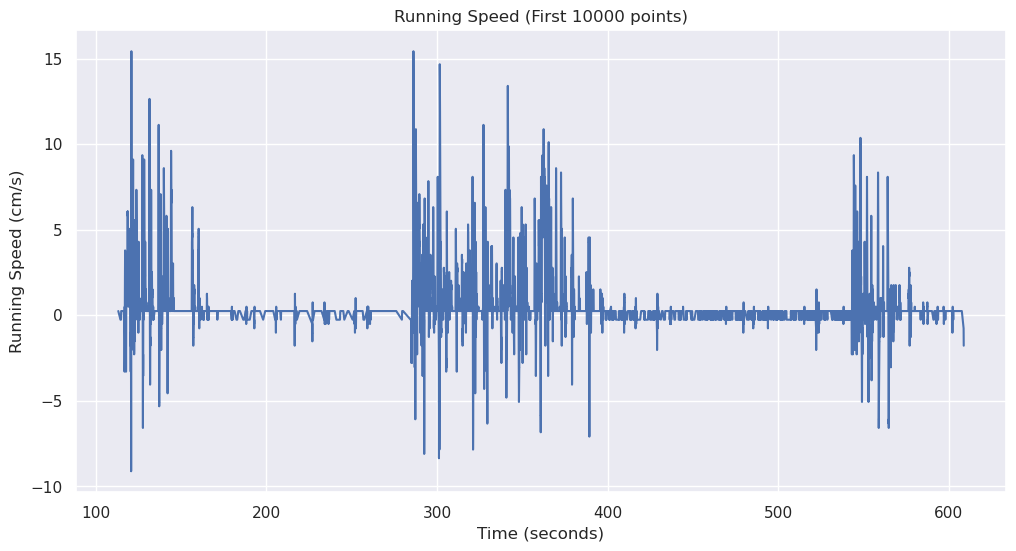

Showing the first 10000 data points for running speed.


In [4]:
if nwbfile and 'running' in nwbfile.processing and 'running_speed' in nwbfile.processing['running'].data_interfaces:
    running_speed_ts = nwbfile.processing['running']['running_speed']
    
    # Load a subset of data to avoid excessive memory usage and processing time, e.g., first 10000 points
    num_points_to_plot = 10000
    
    running_speed_data = running_speed_ts.data[:num_points_to_plot]
    running_speed_timestamps = running_speed_ts.timestamps[:num_points_to_plot]
    
    if running_speed_data.shape[0] > 0: # Check if data was loaded
        plt.figure(figsize=(12, 6))
        plt.plot(running_speed_timestamps, running_speed_data)
        plt.xlabel(f"Time ({running_speed_ts.timestamps_unit})")
        plt.ylabel(f"Running Speed ({running_speed_ts.unit})")
        plt.title(f"Running Speed (First {num_points_to_plot} points)")
        plt.show()
        print(f"Showing the first {min(num_points_to_plot, len(running_speed_ts.data))} data points for running speed.")
    else:
        print("No running speed data to plot or subset is empty.")
else:
    print("Running speed data not found or NWB file not loaded.")

The plot above shows the animal's running speed over a segment of time. This can be correlated with neural activity or other behavioral events.

### Pupil Area

Now let's look at the pupil area from the `EyeTracking` data.

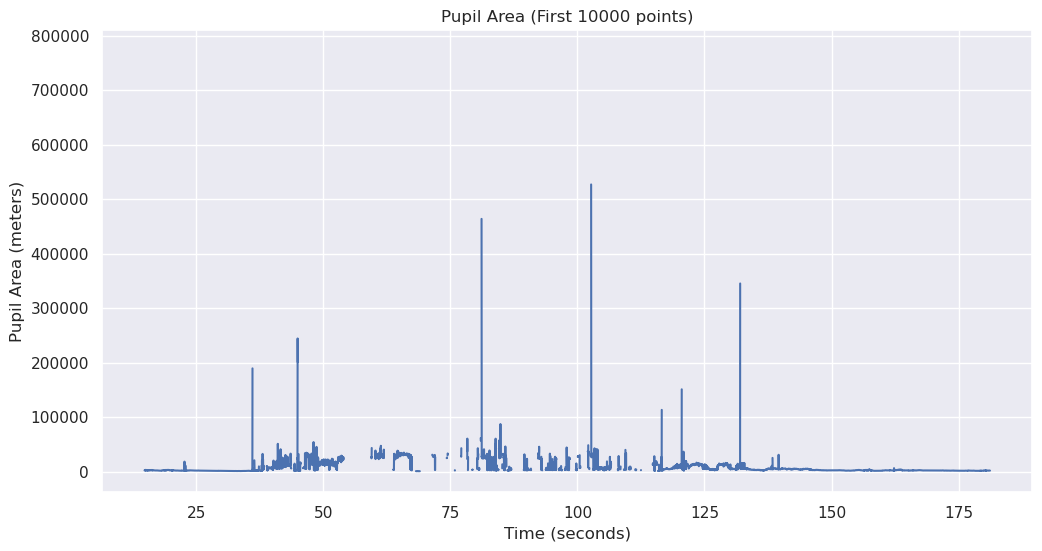

Showing the first 10000 data points for pupil area.
Note: The unit for pupil area might need careful interpretation based on NWB file specifics (e.g., if 'meters' refers to x,y, unit for area could be m^2).


In [5]:
if nwbfile and 'EyeTracking' in nwbfile.acquisition and \
   'pupil_tracking' in nwbfile.acquisition['EyeTracking'].spatial_series:
    
    pupil_tracking_series = nwbfile.acquisition['EyeTracking'].spatial_series['pupil_tracking']
    
    # Load a subset of pupil area data, e.g., first 10000 points
    num_points_to_plot_pupil = 10000
    
    # Check if 'area' and 'timestamps' are available
    if hasattr(pupil_tracking_series, 'area') and hasattr(pupil_tracking_series, 'timestamps'):
        pupil_area_data = pupil_tracking_series.area[:num_points_to_plot_pupil]
        # Timestamps for pupil area are directly under pupil_tracking_series.timestamps
        # However, the tools_cli output refers to pupil_tracking_series.timestamps.timestamps for another EllipseSeries.
        # Let's use pupil_tracking_series.timestamps as it's simpler and commonly how TimeSeries timestamps are stored.
        # If pupil_tracking_series.timestamps is another Series, we'd use .timestamps.data[:]
        # For NWB, if timestamps is a dataset, it should be accessed directly e.g. pupil_tracking_series.timestamps[:]
        # The nwb-file-info implies pupil_tracking.timestamps is an EllipseSeries itself which is confusing.
        # Let's assume pupil_tracking_series.timestamps is the dataset of timestamps for pupil_tracking_series.data
        # The tools_cli output shows pupil_tracking (EllipseSeries) having its own .timestamps (Dataset).
        # And also pupil_tracking.timestamps (EllipseSeries) which is probably a mistake in the tool output or NWB schema interpretation.
        # We will use pupil_tracking_series.timestamps which should be the primary timestamps for this series.

        if hasattr(pupil_tracking_series.timestamps, 'data'): # If timestamps is a TimeSeries itself
            pupil_area_timestamps = pupil_tracking_series.timestamps.data[:num_points_to_plot_pupil]
            timestamps_unit = pupil_tracking_series.timestamps.timestamps_unit
        else: # If timestamps is a direct dataset
            pupil_area_timestamps = pupil_tracking_series.timestamps[:num_points_to_plot_pupil]
            timestamps_unit = pupil_tracking_series.timestamps_unit

        if pupil_area_data.shape[0] > 0:
            plt.figure(figsize=(12, 6))
            plt.plot(pupil_area_timestamps, pupil_area_data)
            plt.xlabel(f"Time ({timestamps_unit})")
            plt.ylabel(f"Pupil Area ({pupil_tracking_series.unit})") # Unit for area might be meters^2 or pixels^2. The EllipseSeries unit is 'meters' for x,y data.
            plt.title(f"Pupil Area (First {num_points_to_plot_pupil} points)")
            plt.show()
            print(f"Showing the first {min(num_points_to_plot_pupil, len(pupil_tracking_series.area))} data points for pupil area.")
            print(f"Note: The unit for pupil area might need careful interpretation based on NWB file specifics (e.g., if 'meters' refers to x,y, unit for area could be m^2).")
        else:
            print("No pupil area data to plot or subset is empty.")
    else:
        print("Pupil area data or its timestamps not found in the expected structure.")
else:
    print("Pupil tracking data not found or NWB file not loaded.")

### Spike Times for a Single Unit

Let's visualize the spike times for one of the recorded units. We will select the first unit that is marked as "good" quality, if available, otherwise the first unit.

Selected a 'good' quality unit with ID: 12


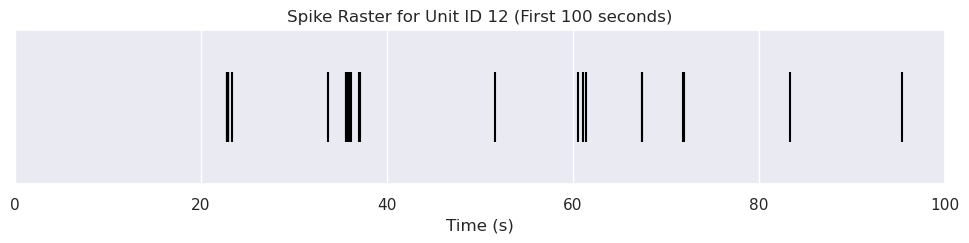

Showing spike times for unit 12 occurring before 100 seconds.


In [6]:
if nwbfile and nwbfile.units is not None and len(nwbfile.units.id) > 0:
    units_df = nwbfile.units.to_dataframe()
    
    selected_unit_id = None
    if 'quality' in units_df.columns:
        good_units = units_df[units_df['quality'] == 'good']
        if not good_units.empty:
            selected_unit_id = good_units.index[0] # .index here because to_dataframe uses 'id' as index
            print(f"Selected a 'good' quality unit with ID: {selected_unit_id}")
        else:
            selected_unit_id = units_df.index[0]
            print(f"No 'good' quality units found. Selected the first available unit with ID: {selected_unit_id}")
    else:
        selected_unit_id = units_df.index[0] # 'id' is the index of the dataframe
        print(f"'quality' column not found. Selected the first available unit with ID: {selected_unit_id}")

    # Get spike times for the selected unit
    # The spike_times_index might be different from the unit_id if unit_id is not 0-based sequential
    # We need to get the actual row corresponding to selected_unit_id
    unit_row_index = np.where(nwbfile.units.id[:] == selected_unit_id)[0][0]
    
    spike_times = nwbfile.units['spike_times'][unit_row_index] # This gets the list/array of spike times for that unit

    if spike_times is not None and len(spike_times) > 0:
        # Let's plot a raster for a short time window, e.g., the first 100 seconds of recording
        time_window_plot = 100  # seconds
        spikes_in_window = spike_times[spike_times < time_window_plot]

        if len(spikes_in_window) > 0:
            plt.figure(figsize=(12, 2))
            # For a single unit, a raster is just event plot
            plt.eventplot(spikes_in_window, lineoffsets=1, linelengths=0.8, colors='black')
            plt.xlabel(f"Time ({nwbfile.units.spike_times.unit if hasattr(nwbfile.units.spike_times, 'unit') else 's'})")
            plt.yticks([])
            plt.title(f"Spike Raster for Unit ID {selected_unit_id} (First {time_window_plot} seconds)")
            plt.xlim(0, time_window_plot)
            plt.show()
            print(f"Showing spike times for unit {selected_unit_id} occurring before {time_window_plot} seconds.")
        else:
            print(f"No spikes found for unit ID {selected_unit_id} in the first {time_window_plot} seconds.")
    else:
        print(f"No spike times found for unit ID {selected_unit_id}.")
        
else:
    print("Units data not found, NWB file not loaded, or no units available.")

## Exploring Stimulus Presentation Times

The NWB file contains detailed information about stimulus presentations in `nwbfile.intervals`. These are stored as `TimeIntervals` tables. Let's look at one such table. We'll choose `SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations` as an example if it exists.


First 5 rows of the 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations' stimulus table:


,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,orientation,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,113.102930,113.119610,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(0, 1, timestamps pynwb.base.TimeSeries at 0x..."
1,113.119610,113.136289,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(1, 1, timestamps pynwb.base.TimeSeries at 0x..."
2,113.136289,113.152969,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(2, 1, timestamps pynwb.base.TimeSeries at 0x..."
3,113.152969,113.169648,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(3, 1, timestamps pynwb.base.TimeSeries at 0x..."
4,113.169648,113.186328,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,0.0,[stimulus_time_interval],"[(4, 1, timestamps pynwb.base.TimeSeries at 0x..."



Columns in 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations': ['start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries']


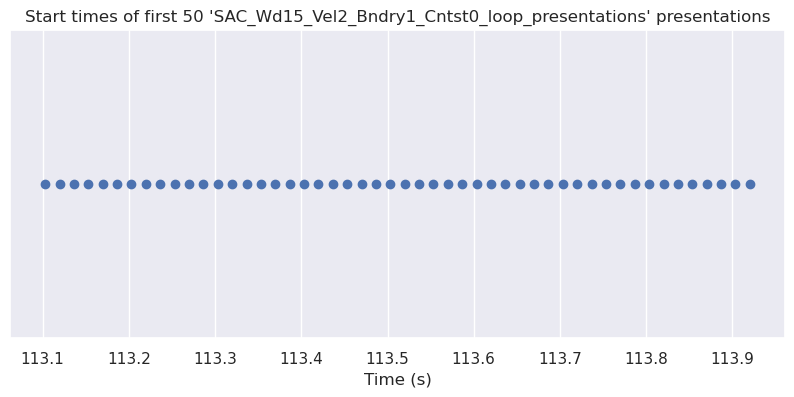

In [7]:
if nwbfile and nwbfile.intervals:
    stimulus_table_name = "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations" # Example from nwb-file-info output
    if stimulus_table_name in nwbfile.intervals:
        stim_table = nwbfile.intervals[stimulus_table_name].to_dataframe()
        print(f"\nFirst 5 rows of the '{stimulus_table_name}' stimulus table:")
        # Displaying with pandas for better formatting if available, otherwise print might be too verbose
        try:
            from IPython.display import display
            display(stim_table.head())
        except ImportError:
            print(stim_table.head().to_string())
        
        print(f"\nColumns in '{stimulus_table_name}': {list(stim_table.columns)}")

        # Example: Plot start times of these stimuli
        if 'start_time' in stim_table.columns:
            # Plot a small number of start times
            num_stim_to_plot = 50 
            plt.figure(figsize=(10, 4))
            plt.plot(stim_table['start_time'].iloc[:num_stim_to_plot], np.zeros(min(num_stim_to_plot, len(stim_table))), 'o', label='Stimulus Start')
            plt.xlabel("Time (s)")
            plt.title(f"Start times of first {num_stim_to_plot} '{stimulus_table_name}' presentations")
            plt.yticks([])
            plt.show()
    else:
        print(f"Stimulus table '{stimulus_table_name}' not found in nwbfile.intervals.")
        print(f"Available interval tables: {list(nwbfile.intervals.keys())}")
else:
    print("Intervals data not found or NWB file not loaded.")

## Summary and Future Directions

This notebook demonstrated how to:
*   Access and get basic information about Dandiset 000690.
*   Load a specific NWB file (`sub-692072/sub-692072_ses-1298465622.nwb`) from the Dandiset.
*   Inspect its high-level structure and metadata.
*   Load and visualize example data:
    *   Running speed over time.
    *   Pupil area over time.
    *   Spike times for a single unit.
    *   Start times of a specific visual stimulus.

**Future Directions for Analysis:**

1.  **Correlate Neural Activity with Behavior:** Analyze how neural firing rates (from `nwbfile.units`) change in relation to behavioral variables like running speed or pupil diameter.
2.  **Event-Related Analysis:** Investigate neural responses aligned to specific stimulus events from the `nwbfile.intervals` tables. For example, compute peri-stimulus time histograms (PSTHs) for different visual stimuli.
3.  **Explore Electrode Data:** The `nwbfile.electrodes` table provides spatial information for each electrode. This could be used to map activity across different brain regions if such information is accurately encoded. (Note: This specific file seems to group electrodes by probe (A, B, E, F) but detailed CCF coordinates might be in separate `_ecephys.nwb` files if available for this subject/session).
4.  **Population Analysis:** Examine patterns of activity across many neurons simultaneously, potentially using dimensionality reduction techniques.
5.  **Compare Across Stimuli:** The Dandiset contains various visual stimuli (simple bars, movies). Analyze how neural representations differ for these stimulus types.
6.  **Deeper Dive into Eye Tracking:** The EyeTracking data contains more than just pupil area (e.g., corneal reflection, gaze position if available). This could be used for more detailed analyses of visual attention.

Remember that this notebook provides a starting point. The richness of the NWB format and the DANDI archive allows for extensive further exploration. Always refer to the Dandiset's documentation and associated publications for more context on the experimental design and data collection methods.

**Clean up: Close the HDF5 file and remote file object if they were opened.**
(This is important especially in scripts or longer sessions to release resources)

In [8]:
# Close the NWB file and underlying HDF5 file
# This needs to be done carefully if nwbfile was successfully loaded
if 'io' in locals() and io: # Check if io exists and is not None
    try:
        io.close()
        print("NWBHDF5IO closed.")
    except Exception as e:
        print(f"Error closing NWBHDF5IO: {e}")

if 'h5_f' in locals() and h5_f: # Check if h5_f exists and is not None
    try:
        h5_f.close()
        print("HDF5 file closed.")
    except Exception as e:
        print(f"Error closing HDF5 file: {e}")
        
if 'remote_f' in locals() and remote_f: # Check if remote_f exists and is not None
    try:
        remote_f.close() # remfile.File might also have a close method or rely on garbage collection
        print("Remote file object closed (if applicable for remfile.File).")
    except Exception as e:
        print(f"Error closing remote file object: {e}")

print("\nNotebook execution finished.")

NWBHDF5IO closed.


Remote file object closed (if applicable for remfile.File).

Notebook execution finished.
